Neste notebook são feitas as primeiras análises exploratórias sobre criminologia na cidade de San Francisco - Califórnia

Dados tirados do Kaggle: https://www.kaggle.com/c/sf-crime/data

In [1]:
%pip freeze > requirements.txt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


In [2]:
dadosCrime2 = pd.read_csv("train.csv")
# .shape exibe o tamanho da tabela (linhas e colunas)
print('Tamanho:',dadosCrime2.shape)
dadosCrime2.head(10)

Tamanho: (878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802


In [3]:
#retirei as colunas X e Y porque não irão ser usadas por enquanto
dadosCrime2 = dadosCrime2.drop(columns = ['X'])
dadosCrime2 = dadosCrime2.drop(columns = ['Y'])
dadosCrime2.head(10)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST


In [4]:
#mostra a quantidade total de linhas
dadosCrime2.index

RangeIndex(start=0, stop=878049, step=1)

In [5]:
# observando os tipos de dados que tenho
dadosCrime2.values

array([['2015-05-13 23:53:00', 'WARRANTS', 'WARRANT ARREST', ...,
        'NORTHERN', 'ARREST, BOOKED', 'OAK ST / LAGUNA ST'],
       ['2015-05-13 23:53:00', 'OTHER OFFENSES',
        'TRAFFIC VIOLATION ARREST', ..., 'NORTHERN', 'ARREST, BOOKED',
        'OAK ST / LAGUNA ST'],
       ['2015-05-13 23:33:00', 'OTHER OFFENSES',
        'TRAFFIC VIOLATION ARREST', ..., 'NORTHERN', 'ARREST, BOOKED',
        'VANNESS AV / GREENWICH ST'],
       ...,
       ['2003-01-06 00:01:00', 'LARCENY/THEFT',
        'GRAND THEFT FROM LOCKED AUTO', ..., 'SOUTHERN', 'NONE',
        '5TH ST / FOLSOM ST'],
       ['2003-01-06 00:01:00', 'VANDALISM',
        'MALICIOUS MISCHIEF, VANDALISM OF VEHICLES', ..., 'SOUTHERN',
        'NONE', 'TOWNSEND ST / 2ND ST'],
       ['2003-01-06 00:01:00', 'FORGERY/COUNTERFEITING',
        'CHECKS, FORGERY (FELONY)', ..., 'BAYVIEW', 'NONE',
        '1800 Block of NEWCOMB AV']], dtype=object)

In [6]:
#total de valores não repetidos
dadosCrime2.nunique()

Dates         389257
Category          39
Descript         879
DayOfWeek          7
PdDistrict        10
Resolution        17
Address        23228
dtype: int64

In [7]:
dadosCrime2.groupby('Category').count()

,Dates,Descript,DayOfWeek,PdDistrict,Resolution,Address
Category,,,,,,
ARSON,1513,1513,1513,1513,1513,1513
ASSAULT,76876,76876,76876,76876,76876,76876
BAD CHECKS,406,406,406,406,406,406
BRIBERY,289,289,289,289,289,289
BURGLARY,36755,36755,36755,36755,36755,36755
DISORDERLY CONDUCT,4320,4320,4320,4320,4320,4320
DRIVING UNDER THE INFLUENCE,2268,2268,2268,2268,2268,2268
DRUG/NARCOTIC,53971,53971,53971,53971,53971,53971
DRUNKENNESS,4280,4280,4280,4280,4280,4280


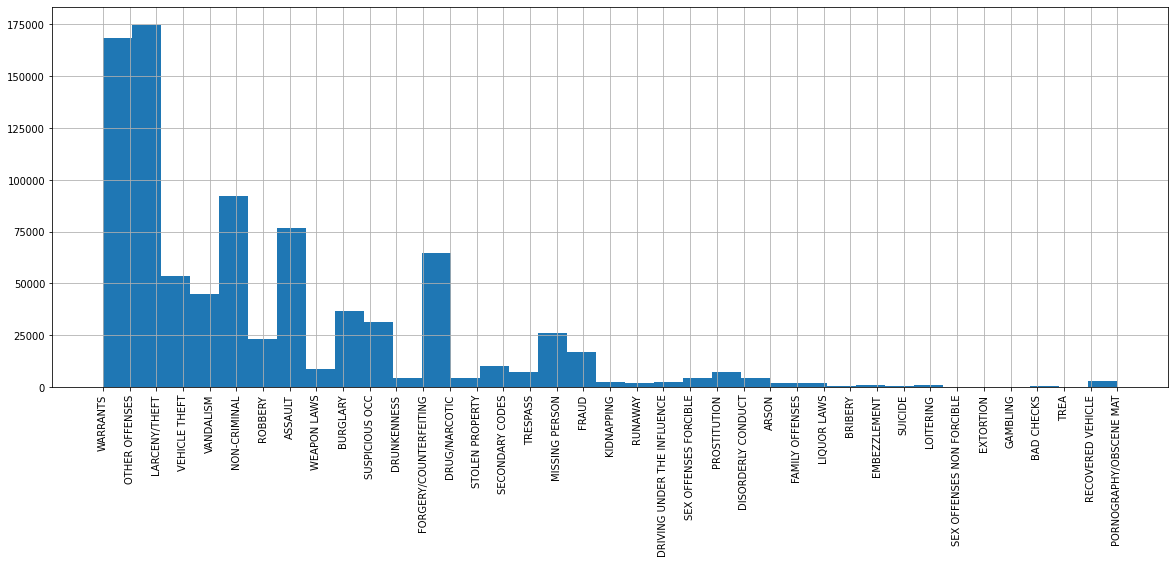

In [14]:
dadosCrime2.Category.hist(bins = 35)
plt.rcParams['figure.figsize'] = (20,7)
plt.xticks(rotation = 90)
plt.show()

In [9]:
#Dias da semana que mais acontecem crimes
dadosCrime2.groupby('DayOfWeek').count()

,Dates,Category,Descript,PdDistrict,Resolution,Address
DayOfWeek,,,,,,
Friday,133734,133734,133734,133734,133734,133734
Monday,121584,121584,121584,121584,121584,121584
Saturday,126810,126810,126810,126810,126810,126810
Sunday,116707,116707,116707,116707,116707,116707
Thursday,125038,125038,125038,125038,125038,125038
Tuesday,124965,124965,124965,124965,124965,124965
Wednesday,129211,129211,129211,129211,129211,129211


In [11]:
#Região onde ocorre mais crimes
dadosCrime2.groupby('PdDistrict').count()

,Dates,Category,Descript,DayOfWeek,Resolution,Address
PdDistrict,,,,,,
BAYVIEW,89431,89431,89431,89431,89431,89431
CENTRAL,85460,85460,85460,85460,85460,85460
INGLESIDE,78845,78845,78845,78845,78845,78845
MISSION,119908,119908,119908,119908,119908,119908
NORTHERN,105296,105296,105296,105296,105296,105296
PARK,49313,49313,49313,49313,49313,49313
RICHMOND,45209,45209,45209,45209,45209,45209
SOUTHERN,157182,157182,157182,157182,157182,157182
TARAVAL,65596,65596,65596,65596,65596,65596


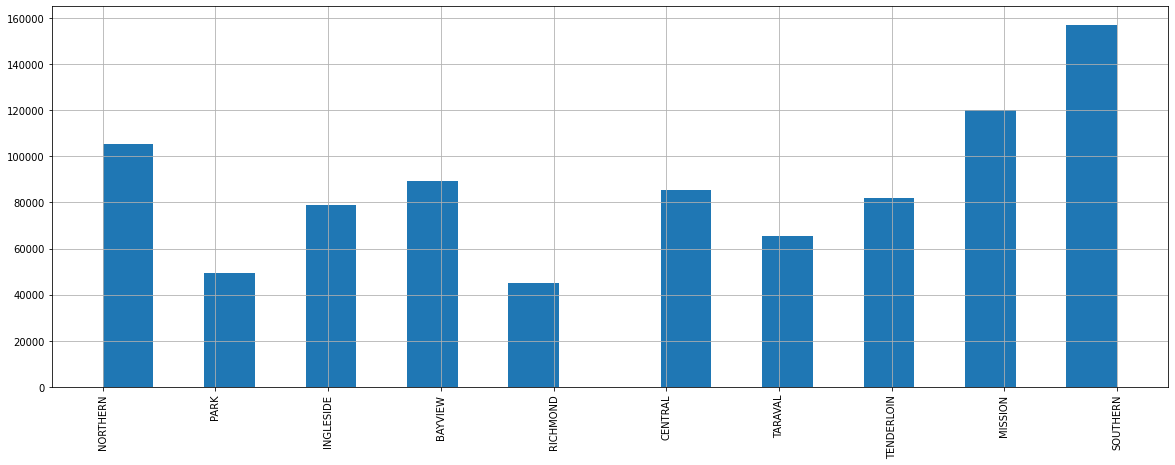

In [20]:
dadosCrime2.PdDistrict.hist(bins = 20)
plt.rcParams['figure.figsize'] = (20,7)
plt.xticks(rotation = 90)
plt.show()

In [12]:
#descrição da violência
dadosCrime2.groupby('Resolution').count()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Address
Resolution,,,,,,
"ARREST, BOOKED",206403,206403,206403,206403,206403,206403
"ARREST, CITED",77004,77004,77004,77004,77004,77004
CLEARED-CONTACT JUVENILE FOR MORE INFO,217,217,217,217,217,217
COMPLAINANT REFUSES TO PROSECUTE,3976,3976,3976,3976,3976,3976
DISTRICT ATTORNEY REFUSES TO PROSECUTE,3934,3934,3934,3934,3934,3934
EXCEPTIONAL CLEARANCE,1530,1530,1530,1530,1530,1530
JUVENILE ADMONISHED,1455,1455,1455,1455,1455,1455
JUVENILE BOOKED,5564,5564,5564,5564,5564,5564
JUVENILE CITED,3332,3332,3332,3332,3332,3332
